In [1]:
import pickle

def load_pickle(file_path):
    with open(file_path, "rb") as f:
        data = pickle.load(f)
    return data

path= '/kaggle/input/cmu-mosei/unaligned_50.pkl'

data = load_pickle(path)

In [2]:
type(data)

dict

In [3]:
len(data)

3

In [4]:
data['train'].keys()

dict_keys(['raw_text', 'audio', 'vision', 'id', 'text', 'text_bert', 'audio_lengths', 'vision_lengths', 'annotations', 'classification_labels', 'regression_labels'])

In [ ]:
data['train'].values()

In [7]:
data['test'].keys()

dict_keys(['raw_text', 'audio', 'vision', 'id', 'text', 'text_bert', 'audio_lengths', 'vision_lengths', 'annotations', 'classification_labels', 'regression_labels'])

In [8]:
data['valid'].keys()

dict_keys(['raw_text', 'audio', 'vision', 'id', 'text', 'text_bert', 'audio_lengths', 'vision_lengths', 'annotations', 'classification_labels', 'regression_labels'])

In [9]:
train_size = len(data["train"]["raw_text"])
test_size = len(data["test"]["raw_text"])
val_size = len(data["valid"]["raw_text"])
print(f"Train Rows: {train_size}, Test Rows: {test_size}, Validation Rows: {val_size}")

Train Rows: 16326, Test Rows: 4659, Validation Rows: 1871


In [10]:
for key, values in data['train'].items():
    print(f"{key}: {type(values)}, ")

raw_text: <class 'numpy.ndarray'>, 
audio: <class 'numpy.ndarray'>, 
vision: <class 'numpy.ndarray'>, 
id: <class 'list'>, 
text: <class 'numpy.ndarray'>, 
text_bert: <class 'numpy.ndarray'>, 
audio_lengths: <class 'list'>, 
vision_lengths: <class 'list'>, 
annotations: <class 'list'>, 
classification_labels: <class 'numpy.ndarray'>, 
regression_labels: <class 'numpy.ndarray'>, 


In [11]:
data['train']['vision']

array([[[ -1.21082997,  -0.46178699,  -0.51150799, ...,   2.28578997,
          19.25449944,  -1.83406997],
        [ -1.46630001,  -0.605802  ,  -0.63063502, ...,   1.04263997,
          19.59289932,  -1.57695997],
        [ -1.66624999,  -0.286722  ,  -0.71854699, ...,  -0.39830101,
          20.09429932,  -1.32193995],
        ...,
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ]],

       [[ -1.78582001,  -0.63808399,   0.74307901, ...,  -0.939619  ,
          21.28389931,  -0.99572998],
        [ -1.81684005,  -0.69895202,   0.76330298, ...,  -0.35126901,
          21.37739944,  -1.46116996],
        [ -1.48545003,  -0.32383499,   0.18769699, ...,   1.04356003,
          20.34189987,  -1.40414   ],
        ...,


In [14]:
import pandas as pd

In [15]:
from datasets import Dataset, DatasetDict

In [ ]:
# train_dataset = Dataset.from_dict(data["train"])
# test_dataset = Dataset.from_dict(data["test"])
# val_dataset = Dataset.from_dict(data["val"])

# dataset_dict = DatasetDict({
#     "train": train_dataset,
#     "test": test_dataset,
#     "val": val_dataset
# })

# print(dataset_dict)

In [16]:
def save_dict_to_csv(data, filename):
    for key in data:
        data[key] = [str(item) if isinstance(item, (list, dict)) else item for item in data[key]]
    
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)  
    print(f"Saved: {filename}")

In [ ]:
# len(data['train']['audio'][0])
# >>> 500
# len(data['train']['audio'][0][0])
# >>> 74

# len(data['train']['vision'][0])
# 500 
# len(data['train']['vision'][0][0])
# >>> 35

In [ ]:
save_dict_to_csv(data["train"], "train.csv")
save_dict_to_csv(data["test"], "test.csv")
save_dict_to_csv(data["valid"], "val.csv")

In [ ]:
df_train = pd.read_csv('/kaggle/working/train.csv')

In [ ]:
df_train.head(3)

In [ ]:
df_train.drop(['text', 'text_bert','audio_lengths','vision_lengths'], axis=1, inplace=True)

In [ ]:
df_train.head(2)

In [ ]:
df_test = pd.read_csv('/kaggle/working/test.csv')

In [ ]:
df_test.drop(['text', 'text_bert','audio_lengths','vision_lengths'], axis=1, inplace=True)

In [ ]:
df_val = pd.read_csv('/kaggle/working/val.csv')

In [ ]:
df_val.drop(['text', 'text_bert','audio_lengths','vision_lengths'], axis=1, inplace=True)

In [ ]:
df_train.to_csv('train_updated.csv', index=False)

<div style="background: linear-gradient(135deg, #8B4513, #D2691E); padding: 20px; text-align: center; color: white; border-radius: 12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.4), inset 0px 0px 12px rgba(255, 255, 255, 0.2);">
  <p style="font-size: 30px; font-weight: bold; font-family: 'Poppins', sans-serif; letter-spacing: 1px; text-shadow: 2px 2px 8px rgba(0, 0, 0, 0.5);">
    Multimodal Sentiment Analysis
  </p>
</div>

### **📜 Premise for the Notebook**  

**💡 Multimodal Sentiment Analysis: Bridging Text, Audio, and Vision for Emotion Understanding**  

In the modern AI landscape, sentiment analysis has evolved beyond simple text-based approaches. Human emotions are complex, and true sentiment understanding requires integrating multiple modalities—text, speech, and visual cues. This notebook explores **Multimodal Sentiment Analysis** using deep learning, leveraging state-of-the-art techniques to enhance emotion recognition accuracy.  

#### **🌟 Why Multimodal Sentiment Analysis?**  
Traditional sentiment analysis relies heavily on text, but real-world emotions are often **non-verbal**. A sarcastic statement, for instance, may carry a **positive textual meaning but a negative sentiment in tone and expression**. By fusing multiple data sources—**text, audio, and vision**—we create a robust model that captures hidden emotional signals.  

#### **🚀 What This Notebook Covers:**  
1. **Data Preparation & Feature Extraction**  
   - Text embeddings via **DistilBERT**  
   - Audio features (MFCC, Spectrograms)  
   - Vision features using **CNN-based encoders**  

2. **Fusion Strategies for Sentiment Classification**  
   - **Weighted Average Fusion** (simple yet effective)  
   - **Deep Learning-based Fusion** (concatenation with fully connected layers)  
   - **Machine Learning-based Fusion** (SVM, Decision Trees)  

3. **Training & Evaluation**  
   - Experiments with different fusion techniques  
   - Performance comparison using metrics like **accuracy, F1-score, and confusion matrices**  


<div style="background: linear-gradient(135deg, #2E8B57, #3CB371); padding: 15px; text-align: center; color: white; border-radius: 8px; box-shadow: 0px 3px 8px rgba(0, 0, 0, 0.2); margin-top: 15px;">
  <p style="font-size: 22px; font-weight: bold; font-family: 'Arial', sans-serif;">
    Importing Required Libraries
  </p>
</div>

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from transformers import DistilBertModel, DistilBertTokenizer
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [18]:
# nlp = spacy.load("en_core_web_sm")

NameError: name 'spacy' is not defined

<div style="background: linear-gradient(135deg, #4682B4, #1E90FF); padding: 15px; text-align: center; color: white; border-radius: 8px; box-shadow: 0px 3px 8px rgba(0, 0, 0, 0.2); margin-top: 15px;">
  <p style="font-size: 22px; font-weight: bold; font-family: 'Arial', sans-serif;">
    Setting Constants and Hyperparameters
  </p>
</div>

In [19]:
torch.manual_seed(42)
np.random.seed(42)

In [34]:
NUM_CLASSES = 3  # 0: negative, 1: neutral, 2: positive
BATCH_SIZE = 32
NUM_EPOCHS = 25
LEARNING_RATE = 1e-4
TEXT_HIDDEN_SIZE = 768 
AUDIO_FEATURE_SIZE = 74
VISION_FEATURE_SIZE = 35
FUSION_HIDDEN_SIZE = 256        

In [21]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
bert_model = DistilBertModel.from_pretrained("distilbert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

<div style="background: linear-gradient(135deg, #8A2BE2, #9400D3); padding: 15px; text-align: center; color: white; border-radius: 8px; box-shadow: 0px 3px 8px rgba(0, 0, 0, 0.2); margin-top: 15px;">
  <p style="font-size: 22px; font-weight: bold; font-family: 'Arial', sans-serif;">
    Creating the Custom Dataset Class
  </p>
</div>

In [22]:
class MultimodalSentimentDataset(Dataset):
    def __init__(self, data_dict, tokenizer, max_length=128):
        self.raw_texts = data_dict['raw_text']
        self.audio_features = data_dict['audio']
        self.vision_features = data_dict['vision']
        self.labels = data_dict['classification_labels']
        self.ids = data_dict['id']
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.raw_texts)
    
    def __getitem__(self, idx):
        raw_text = self.raw_texts[idx]
        
        encoding = self.tokenizer(
            raw_text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()
        
        # Just using the first frame for saving time :(
        audio_feature = torch.tensor(self.audio_features[idx][0], dtype=torch.float)
        vision_feature = torch.tensor(self.vision_features[idx][0], dtype=torch.float)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        
        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'audio_feature': audio_feature,
            'vision_feature': vision_feature,
            'label': label,
            'id': self.ids[idx]
        }

In [23]:
class TextEncoder(nn.Module):
    def __init__(self, freeze_bert=False):
        super(TextEncoder, self).__init__()
        self.distilbert = DistilBertModel.from_pretrained('distilbert-base-uncased')
        if freeze_bert:
            for param in self.distilbert.parameters():
                param.requires_grad = False
        self.dropout = nn.Dropout(0.1)
        
    def forward(self, input_ids, attention_mask):
        outputs = self.distilbert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0]
        return self.dropout(pooled_output)

<div style="background: linear-gradient(135deg, #FF5733, #C70039); padding: 15px; text-align: center; color: white; border-radius: 10px; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3), inset 0px 0px 10px rgba(255, 255, 255, 0.2); margin-top: 20px;">
  <p style="font-size: 24px; font-weight: bold; font-family: 'Poppins', sans-serif; text-shadow: 2px 2px 6px rgba(0, 0, 0, 0.4);">
    🏗️ Building the Weighted Average Fusion Model
  </p>
</div>

In [24]:
class WeightedAverageFusion(nn.Module):
    def __init__(self, text_model, text_hidden_size, audio_size, vision_size, num_classes):
        super(WeightedAverageFusion, self).__init__()
        self.text_model = text_model
        
        # Modality-specific classifiers
        self.text_classifier = nn.Linear(text_hidden_size, num_classes)
        self.audio_classifier = nn.Linear(audio_size, num_classes)
        self.vision_classifier = nn.Linear(vision_size, num_classes)
        
        # Learnable weights for fusion
        self.modality_weights = nn.Parameter(torch.tensor([0.4, 0.3, 0.3], dtype=torch.float))
        self.softmax = nn.Softmax(dim=0)
        
    def forward(self, input_ids, attention_mask, audio_feature, vision_feature):
        # Process text
        text_output = self.text_model(input_ids=input_ids, attention_mask=attention_mask)
        text_cls = text_output.last_hidden_state[:, 0, :]  # [CLS] token embedding
        
        # Get predictions from each modality
        text_pred = self.text_classifier(text_cls)
        audio_pred = self.audio_classifier(audio_feature)
        vision_pred = self.vision_classifier(vision_feature)
        
        # Normalize weights
        weights = self.softmax(self.modality_weights)
        
        # Weighted fusion
        fused_output = (weights[0] * text_pred + 
                         weights[1] * audio_pred + 
                         weights[2] * vision_pred)
        
        return fused_output, text_pred, audio_pred, vision_pred, weights

<div style="background: linear-gradient(135deg, #4682B4, #1E90FF); padding: 15px; text-align: center; color: white; border-radius: 10px; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3), inset 0px 0px 10px rgba(255, 255, 255, 0.2); margin-top: 20px;">
  <p style="font-size: 24px; font-weight: bold; font-family: 'Poppins', sans-serif; text-shadow: 2px 2px 6px rgba(0, 0, 0, 0.4);">
    🎭 Implementing the Deep Learning Fusion Model
  </p>
</div>

In [25]:
class DeepFusionNetwork(nn.Module):
    def __init__(self, text_model, text_hidden_size, audio_size, vision_size, fusion_hidden, num_classes):
        super(DeepFusionNetwork, self).__init__()
        self.text_model = text_model
        
        # Feature extractors
        self.text_projector = nn.Linear(text_hidden_size, fusion_hidden)
        self.audio_projector = nn.Linear(audio_size, fusion_hidden)
        self.vision_projector = nn.Linear(vision_size, fusion_hidden)
        
        # Fusion layers
        self.fusion_layer1 = nn.Linear(fusion_hidden * 3, fusion_hidden)
        self.fusion_layer2 = nn.Linear(fusion_hidden, fusion_hidden // 2)
        self.classifier = nn.Linear(fusion_hidden // 2, num_classes)
        
        # Activation and dropout
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        
    def forward(self, input_ids, attention_mask, audio_feature, vision_feature):
        # Process text
        text_output = self.text_model(input_ids=input_ids, attention_mask=attention_mask)
        text_cls = text_output.last_hidden_state[:, 0, :]  # [CLS] token embedding
        
        # Project each modality to common space
        text_proj = self.relu(self.text_projector(text_cls))
        audio_proj = self.relu(self.audio_projector(audio_feature))
        vision_proj = self.relu(self.vision_projector(vision_feature))
        
        # Concatenate features
        combined = torch.cat([text_proj, audio_proj, vision_proj], dim=1)
        
        # Fusion layers
        fusion = self.relu(self.fusion_layer1(combined))
        fusion = self.dropout(fusion)
        fusion = self.relu(self.fusion_layer2(fusion))
        fusion = self.dropout(fusion)
        
        # Classification
        output = self.classifier(fusion)
        
        return output

<div style="background: linear-gradient(135deg, #FFD700, #FFA500); padding: 15px; text-align: center; color: white; border-radius: 10px; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3), inset 0px 0px 10px rgba(255, 255, 255, 0.2); margin-top: 20px;">
  <p style="font-size: 24px; font-weight: bold; font-family: 'Poppins', sans-serif; text-shadow: 2px 2px 6px rgba(0, 0, 0, 0.4);">
    🧠 Machine Learning Fusion using Extracted Features
  </p>
</div>

In [26]:
class MLFusionFeatureExtractor(nn.Module):
    def __init__(self, text_model, text_hidden_size, audio_size, vision_size, num_classes):
        super(MLFusionFeatureExtractor, self).__init__()
        self.text_model = text_model
        
        # Modality-specific classifiers
        self.text_classifier = nn.Linear(text_hidden_size, num_classes)
        self.audio_classifier = nn.Linear(audio_size, num_classes)
        self.vision_classifier = nn.Linear(vision_size, num_classes)
        
        # Feature projectors for ML fusion
        self.text_projector = nn.Linear(text_hidden_size, 50)
        self.audio_projector = nn.Linear(audio_size, 30)
        self.vision_projector = nn.Linear(vision_size, 30)
        
    def forward(self, input_ids, attention_mask, audio_feature, vision_feature):
        # Process text
        text_output = self.text_model(input_ids=input_ids, attention_mask=attention_mask)
        text_cls = text_output.last_hidden_state[:, 0, :]  # [CLS] token embedding
        
        # Get predictions from each modality
        text_pred = self.text_classifier(text_cls)
        audio_pred = self.audio_classifier(audio_feature)
        vision_pred = self.vision_classifier(vision_feature)
        
        # Get projected features for ML fusion
        text_features = self.text_projector(text_cls)
        audio_features = self.audio_projector(audio_feature)
        vision_features = self.vision_projector(vision_feature)
        
        return text_pred, audio_pred, vision_pred, text_features, audio_features, vision_features

In [27]:
# Helper function to train models
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, model_type="weighted"):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    model.to(device)
    best_val_acc = 0.0
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        total_samples = 0
        
        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            audio_feature = batch['audio_feature'].to(device)
            vision_feature = batch['vision_feature'].to(device)
            labels = batch['label'].to(device)
            
            optimizer.zero_grad()
            
            if model_type == "weighted":
                outputs, _, _, _, weights = model(input_ids, attention_mask, audio_feature, vision_feature)
                loss = criterion(outputs, labels)
            elif model_type == "deep":
                outputs = model(input_ids, attention_mask, audio_feature, vision_feature)
                loss = criterion(outputs, labels)
            
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * input_ids.size(0)
            
            _, predicted = torch.max(outputs, 1)
            train_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
        
        train_loss = train_loss / len(train_loader.dataset)
        train_acc = train_correct / total_samples
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_preds = []
        val_labels = []
        
        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                audio_feature = batch['audio_feature'].to(device)
                vision_feature = batch['vision_feature'].to(device)
                labels = batch['label'].to(device)
                
                if model_type == "weighted":
                    outputs, _, _, _, _ = model(input_ids, attention_mask, audio_feature, vision_feature)
                elif model_type == "deep":
                    outputs = model(input_ids, attention_mask, audio_feature, vision_feature)
                
                loss = criterion(outputs, labels)
                val_loss += loss.item() * input_ids.size(0)
                
                _, predicted = torch.max(outputs, 1)
                val_preds.extend(predicted.cpu().numpy())
                val_labels.extend(labels.cpu().numpy())
            
        val_loss = val_loss / len(val_loader.dataset)
        val_acc = accuracy_score(val_labels, val_preds)
        
        # Save history
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
        print(f'  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')
        
        if model_type == "weighted":
            print(f'  Modality Weights: Text={weights[0]:.2f}, Audio={weights[1]:.2f}, Vision={weights[2]:.2f}')
        
        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), f'best_{model_type}_fusion_model.pt')
            
    return model, history

In [28]:
def extract_ml_fusion_features(model, data_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    
    all_features = []
    all_labels = []
    all_modality_preds = []
    
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            audio_feature = batch['audio_feature'].to(device)
            vision_feature = batch['vision_feature'].to(device)
            labels = batch['label'].to(device)
            
            text_pred, audio_pred, vision_pred, text_features, audio_features, vision_features = model(
                input_ids, attention_mask, audio_feature, vision_feature)
            
            # Get predictions from each modality
            _, text_pred_class = torch.max(text_pred, 1)
            _, audio_pred_class = torch.max(audio_pred, 1)
            _, vision_pred_class = torch.max(vision_pred, 1)
            
            # Convert to numpy for sklearn
            text_features = text_features.cpu().numpy()
            audio_features = audio_features.cpu().numpy()
            vision_features = vision_features.cpu().numpy()
            
            text_pred_probs = torch.nn.functional.softmax(text_pred, dim=1).cpu().numpy()
            audio_pred_probs = torch.nn.functional.softmax(audio_pred, dim=1).cpu().numpy()
            vision_pred_probs = torch.nn.functional.softmax(vision_pred, dim=1).cpu().numpy()
            
            # Combine features for ML fusion
            for i in range(len(labels)):
                combined_features = np.concatenate([
                    text_features[i], 
                    audio_features[i], 
                    vision_features[i],
                    text_pred_probs[i], 
                    audio_pred_probs[i], 
                    vision_pred_probs[i],
                    [text_pred_class[i].item(), audio_pred_class[i].item(), vision_pred_class[i].item()]
                ])
                
                all_features.append(combined_features)
                all_labels.append(labels[i].item())
                
                modality_preds = {
                    'text': text_pred_class[i].item(),
                    'audio': audio_pred_class[i].item(),
                    'vision': vision_pred_class[i].item()
                }
                all_modality_preds.append(modality_preds)
    
    return np.array(all_features), np.array(all_labels), all_modality_preds

In [29]:
def evaluate_model(model, test_loader, criterion, model_type="weighted"):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    
    test_loss = 0.0
    test_preds = []
    test_labels = []
    
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            audio_feature = batch['audio_feature'].to(device)
            vision_feature = batch['vision_feature'].to(device)
            labels = batch['label'].to(device)
            
            if model_type == "weighted":
                outputs, _, _, _, _ = model(input_ids, attention_mask, audio_feature, vision_feature)
            elif model_type == "deep":
                outputs = model(input_ids, attention_mask, audio_feature, vision_feature)
            
            loss = criterion(outputs, labels)
            test_loss += loss.item() * input_ids.size(0)
            
            _, predicted = torch.max(outputs, 1)
            test_preds.extend(predicted.cpu().numpy())
            test_labels.extend(labels.cpu().numpy())
    
    test_loss = test_loss / len(test_loader.dataset)
    test_acc = accuracy_score(test_labels, test_preds)
    
    print(f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')
    print('\nClassification Report:')
    print(classification_report(test_labels, test_preds, target_names=['Negative', 'Neutral', 'Positive']))
    
    return test_loss, test_acc, test_preds, test_labels

In [30]:
# Plot training history
def plot_training_history(history, model_type):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.title(f'{model_type} Fusion - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train Acc')
    plt.plot(history['val_acc'], label='Val Acc')
    plt.title(f'{model_type} Fusion - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(f'{model_type}_fusion_history.png')
    plt.show()

<div style="background: linear-gradient(135deg, #20B2AA, #008B8B); padding: 15px; text-align: center; color: white; border-radius: 10px; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3), inset 0px 0px 10px rgba(255, 255, 255, 0.2); margin-top: 20px;">
  <p style="font-size: 24px; font-weight: bold; font-family: 'Poppins', sans-serif; text-shadow: 2px 2px 6px rgba(0, 0, 0, 0.4);">
    🚀 Training the Fusion Models
  </p>
</div>

In [31]:
def main(data):
    tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
    train_dataset = MultimodalSentimentDataset(data['train'], tokenizer)
    val_dataset = MultimodalSentimentDataset(data['valid'], tokenizer)
    test_dataset = MultimodalSentimentDataset(data['test'], tokenizer)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)
    
    text_model = DistilBertModel.from_pretrained('distilbert-base-uncased')
    
    for param in text_model.parameters():
        param.requires_grad = False
    
    results = {}
    
    # Method 1: Weighted Average Fusion
    print("\n===== Training Weighted Average Fusion Model =====")
    weighted_model = WeightedAverageFusion(
        text_model=text_model,
        text_hidden_size=TEXT_HIDDEN_SIZE,
        audio_size=AUDIO_FEATURE_SIZE,
        vision_size=VISION_FEATURE_SIZE,
        num_classes=NUM_CLASSES
    )
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(weighted_model.parameters(), lr=LEARNING_RATE)
    
    weighted_model, weighted_history = train_model(
        model=weighted_model,
        train_loader=train_loader,
        val_loader=val_loader,
        criterion=criterion,
        optimizer=optimizer,
        num_epochs=NUM_EPOCHS,
        model_type="weighted"
    )
    
    # Load best model
    weighted_model.load_state_dict(torch.load('best_weighted_fusion_model.pt'))
    weighted_loss, weighted_acc, weighted_preds, weighted_labels = evaluate_model(
        model=weighted_model,
        test_loader=test_loader,
        criterion=criterion,
        model_type="weighted"
    )
    
    plot_training_history(weighted_history, "Weighted")
    results['weighted'] = {'acc': weighted_acc, 'loss': weighted_loss}
    
    # Method 2: ML Fusion (Random Forest)
    print("\n===== Training ML Fusion Model =====")
    ml_feature_extractor = MLFusionFeatureExtractor(
        text_model=text_model,
        text_hidden_size=TEXT_HIDDEN_SIZE,
        audio_size=AUDIO_FEATURE_SIZE,
        vision_size=VISION_FEATURE_SIZE,
        num_classes=NUM_CLASSES
    )
    
    # Extract features
    print("Extracting features for ML fusion...")
    train_features, train_labels, _ = extract_ml_fusion_features(ml_feature_extractor, train_loader)
    val_features, val_labels, _ = extract_ml_fusion_features(ml_feature_extractor, val_loader)
    test_features, test_labels, test_modality_preds = extract_ml_fusion_features(ml_feature_extractor, test_loader)
    
    # Train Random Forest classifier
    print("Training Random Forest classifier...")
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(train_features, train_labels)
    
    # Evaluate ML fusion
    rf_preds = rf_classifier.predict(test_features)
    rf_acc = accuracy_score(test_labels, rf_preds)
    
    print(f"ML Fusion Test Accuracy: {rf_acc:.4f}")
    print('\nClassification Report:')
    print(classification_report(test_labels, rf_preds, target_names=['Negative', 'Neutral', 'Positive']))
    
    # Compare with individual modalities
    modality_accuracies = {
        'text': accuracy_score(test_labels, [pred['text'] for pred in test_modality_preds]),
        'audio': accuracy_score(test_labels, [pred['audio'] for pred in test_modality_preds]),
        'vision': accuracy_score(test_labels, [pred['vision'] for pred in test_modality_preds])
    }
    
    print("\nIndividual Modality Accuracies:")
    for modality, acc in modality_accuracies.items():
        print(f"  {modality.capitalize()}: {acc:.4f}")
    
    results['ml'] = {'acc': rf_acc}
    
    # Method 3: Deep Learning Fusion
    print("\n===== Training Deep Learning Fusion Model =====")
    deep_model = DeepFusionNetwork(
        text_model=text_model,
        text_hidden_size=TEXT_HIDDEN_SIZE,
        audio_size=AUDIO_FEATURE_SIZE,
        vision_size=VISION_FEATURE_SIZE,
        fusion_hidden=FUSION_HIDDEN_SIZE,
        num_classes=NUM_CLASSES
    )
    
    optimizer = optim.Adam(deep_model.parameters(), lr=LEARNING_RATE)
    
    deep_model, deep_history = train_model(
        model=deep_model,
        train_loader=train_loader,
        val_loader=val_loader,
        criterion=criterion,
        optimizer=optimizer,
        num_epochs=NUM_EPOCHS,
        model_type="deep"
    )
    
    # Load best model
    deep_model.load_state_dict(torch.load('best_deep_fusion_model.pt'))
    deep_loss, deep_acc, deep_preds, deep_labels = evaluate_model(
        model=deep_model,
        test_loader=test_loader,
        criterion=criterion,
        model_type="deep"
    )
    
    plot_training_history(deep_history, "Deep")
    results['deep'] = {'acc': deep_acc, 'loss': deep_loss}
    
    # Compare all methods
    print("\n===== Comparison of All Fusion Methods =====")
    for method, metrics in results.items():
        print(f"{method.capitalize()} Fusion Accuracy: {metrics['acc']:.4f}")
    
    return results


===== Training Weighted Average Fusion Model =====
Using device: cuda
Epoch 1/25:
  Train Loss: 2.3688, Train Acc: 0.4610
  Val Loss: 1.5352, Val Acc: 0.4062
  Modality Weights: Text=0.36, Audio=0.31, Vision=0.33
Epoch 2/25:
  Train Loss: 1.3066, Train Acc: 0.4448
  Val Loss: 1.2471, Val Acc: 0.4367
  Modality Weights: Text=0.37, Audio=0.30, Vision=0.33
Epoch 3/25:
  Train Loss: 1.0869, Train Acc: 0.4991
  Val Loss: 1.0503, Val Acc: 0.4960
  Modality Weights: Text=0.37, Audio=0.30, Vision=0.33
Epoch 4/25:
  Train Loss: 0.9614, Train Acc: 0.5567
  Val Loss: 0.9583, Val Acc: 0.5505
  Modality Weights: Text=0.37, Audio=0.30, Vision=0.33
Epoch 5/25:
  Train Loss: 0.9086, Train Acc: 0.5940
  Val Loss: 0.9201, Val Acc: 0.5697
  Modality Weights: Text=0.37, Audio=0.30, Vision=0.33
Epoch 6/25:
  Train Loss: 0.8830, Train Acc: 0.6115
  Val Loss: 0.8997, Val Acc: 0.5831
  Modality Weights: Text=0.38, Audio=0.30, Vision=0.32
Epoch 7/25:
  Train Loss: 0.8648, Train Acc: 0.6189
  Val Loss: 0.8844,

<ipython-input-31-801f575e4244>:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weighted_model.load_state_dict(torch.load('best_weighted_fusion_model.pt'))


Test Loss: 0.7765, Test Acc: 0.6615

Classification Report:
              precision    recall  f1-score   support

    Negative       0.67      0.70      0.69      1350
     Neutral       0.50      0.23      0.32      1025
    Positive       0.69      0.83      0.75      2284

    accuracy                           0.66      4659
   macro avg       0.62      0.59      0.58      4659
weighted avg       0.64      0.66      0.64      4659



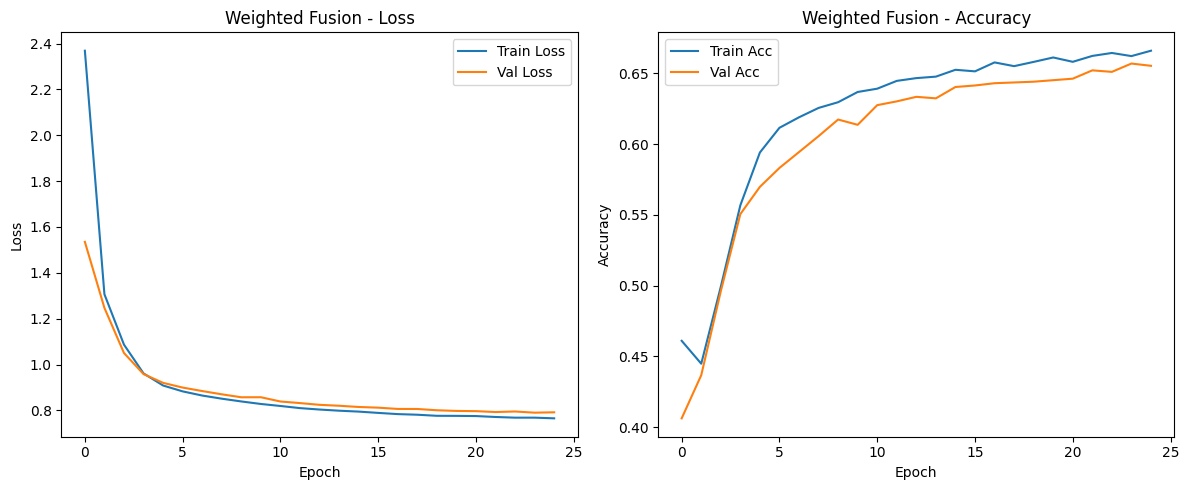


===== Training ML Fusion Model =====
Extracting features for ML fusion...
Training Random Forest classifier...
ML Fusion Test Accuracy: 0.6049

Classification Report:
              precision    recall  f1-score   support

    Negative       0.64      0.53      0.58      1350
     Neutral       0.52      0.08      0.14      1025
    Positive       0.60      0.89      0.71      2284

    accuracy                           0.60      4659
   macro avg       0.58      0.50      0.48      4659
weighted avg       0.59      0.60      0.55      4659


Individual Modality Accuracies:
  Text: 0.2194
  Audio: 0.4681
  Vision: 0.2956

===== Training Deep Learning Fusion Model =====
Using device: cuda
Epoch 1/25:
  Train Loss: 0.9890, Train Acc: 0.5329
  Val Loss: 0.8613, Val Acc: 0.6157
Epoch 2/25:
  Train Loss: 0.8397, Train Acc: 0.6308
  Val Loss: 0.8219, Val Acc: 0.6323
Epoch 3/25:
  Train Loss: 0.8130, Train Acc: 0.6428
  Val Loss: 0.8121, Val Acc: 0.6371
Epoch 4/25:
  Train Loss: 0.7906, Trai

<ipython-input-31-801f575e4244>:125: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  deep_model.load_state_dict(torch.load('best_deep_fusion_model.pt'))


Test Loss: 0.7644, Test Acc: 0.6639

Classification Report:
              precision    recall  f1-score   support

    Negative       0.70      0.68      0.69      1350
     Neutral       0.47      0.27      0.35      1025
    Positive       0.69      0.83      0.75      2284

    accuracy                           0.66      4659
   macro avg       0.62      0.59      0.60      4659
weighted avg       0.64      0.66      0.65      4659



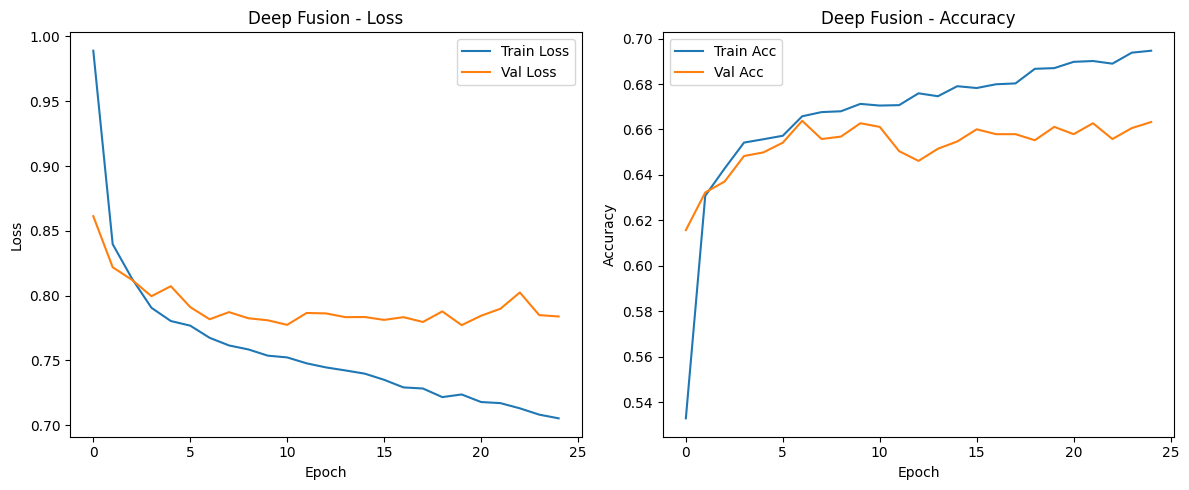


===== Comparison of All Fusion Methods =====
Weighted Fusion Accuracy: 0.6615
Ml Fusion Accuracy: 0.6049
Deep Fusion Accuracy: 0.6639


In [35]:
results = main(data)